***
# Import used libraries

In [2]:
# import used libraries
import pandas as pd                        # pandas for data analysis
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt            # matplotlib for data visualisation
from scipy import stats                    # scipy for ttests

***
# Paths to the csv dataframes

In [3]:
DIR = "data/"

#read
S_TIMESERIES_PATH = DIR + "s_df_timeseries_en.tsv.zip"
S_CHANNELS_PATH   = DIR + "s_df_channels_en.tsv.zip"
S_METADATA_PATH   = DIR + "s_df_metadata_en.tsv.zip"

***
# Import files and convert to datetime corrsepond columns
- **channels** : dataframe with all channels with less than 10.000 subscribers at the start of the period and more than 500.000 subsribers at the end ; they are considered as succesfull channels
- **timeseries** : dataframe with a weekly report on these channels (subs, views, nb_videos, etc.)
- **metadata** : dataframe with informations about all the videos of these channels

In [5]:
s_timeseries = pd.read_csv(S_TIMESERIES_PATH)
s_timeseries.datetime = pd.to_datetime(s_timeseries.datetime)

s_channels   = pd.read_csv(S_CHANNELS_PATH)
s_channels.join_date = pd.to_datetime(s_channels.join_date)

s_metadata   = pd.read_csv(S_METADATA_PATH)
s_metadata.upload_date = pd.to_datetime(s_metadata.upload_date)

###### CHANNELS
*dataframe with all channels with less than 10.000 subscribers at the start of the period and more than 500.000 subsribers at the end ; they are considered as succesfull channels*

In [6]:
s_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.0870
1,Howto & Style,2017-03-15,UC4rlAVgAK0SGk-yTfe48Qpw,BRIGHT SIDE,29800000,2872,36.0,2.0870
2,Music,2013-02-06,UCiGm_E4ZwYSHV3bcW1pnSeQ,Billie Eilish,20735006,22,78.0,2.0870
3,Music,2015-06-23,UCM9r1xn6s30OnlJWb-jc3Sw,XXXTENTACION,21900000,76,94.0,2.0870
4,Entertainment,2012-10-24,UC_vcKmg67vjMP7ciLnSxSHQ,Amit Bhadana,16600000,62,166.0,2.0870
...,...,...,...,...,...,...,...,...
3141,Education,2019-03-08,UC065OFwExGz84peyI5DGtSg,Little Baby Bum - St...,445000,107,37817.0,3.2105
3142,Education,2017-08-25,UCSh_h2MNQDo62bepE3BKcyw,Tospik Kids Art,479337,40,38796.0,3.2505
3143,Entertainment,2016-07-01,UC0OfFNo_U_goQYUEYMoU4BQ,DR BROTHERS,394000,115,45876.0,3.2865
3144,Music,2018-01-29,UCY7AVP0IIPtHFs-7Xm54kwA,The Driver Era,150000,19,99544.0,3.7670


###### TIMESERIES
*dataframe with a weekly report on these channels (subs, views, nb_videos, etc.)*

In [7]:
s_timeseries

,channel,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCltVEZ6GecWntoZ19FvaWhQ,2016-10-03 00:00:00,3.190740e+05,0.000000e+00,3.960000e+03,0.000000,665,0,30
1,UCltVEZ6GecWntoZ19FvaWhQ,2016-10-10 00:00:00,3.472411e+05,2.816712e+04,4.383500e+03,423.500000,669,4,33
2,UCltVEZ6GecWntoZ19FvaWhQ,2016-10-17 00:00:00,3.817262e+05,3.448512e+04,4.953250e+03,569.750000,675,6,29
3,UCltVEZ6GecWntoZ19FvaWhQ,2016-10-24 00:00:00,4.469281e+05,6.520188e+04,5.601125e+03,647.875000,681,6,12
4,UCltVEZ6GecWntoZ19FvaWhQ,2016-10-30 23:00:00,5.109108e+05,6.398266e+04,6.306819e+03,705.693653,682,1,13
...,...,...,...,...,...,...,...,...,...
414191,UCY6Ij8zOds0WJEeqCLOnqOQ,2019-09-02 00:00:00,1.519259e+08,4.517518e+06,1.535577e+06,31061.875000,164,1,2
414192,UCY6Ij8zOds0WJEeqCLOnqOQ,2019-09-09 00:00:00,1.554422e+08,3.516317e+06,1.558057e+06,22479.625000,165,1,2
414193,UCY6Ij8zOds0WJEeqCLOnqOQ,2019-09-16 00:00:00,1.582264e+08,2.784177e+06,1.568507e+06,10450.125000,166,1,2
414194,UCY6Ij8zOds0WJEeqCLOnqOQ,2019-09-23 00:00:00,1.617288e+08,3.502370e+06,1.592500e+06,23992.875000,167,1,2


###### METADATA
*dataframe with informations about all the videos of these channels*

In [8]:
s_metadata

,channel,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,UCzx8WFdvYyQgPuLY3XSU83Q,5.0,2W6AuC2wk_g,144,63.0,HOMEMADE HAIR SPRAY FOR SOFT HAIR,HOMEMADE HAIR SPRAY FOR SOFT HAIR,2019-09-27,1831.0
1,UCzx8WFdvYyQgPuLY3XSU83Q,21.0,aWoUYvgdTvw,2843,171.0,"HOMEMADE FOUNDATION,HOMEMADE KAJAL,HOMEMADE BL...",HOMEMADE MAKEUP KIT | HOMEMADE MAKEUP PRODUCTS,2019-09-26,5027.0
2,UCzx8WFdvYyQgPuLY3XSU83Q,7.0,AHsKMjJ3ngA,279,67.0,"GET SOFT HAIR,INDIAN LONG HAIR,LONG HAIR,How T...",HOMEMADE ALOEVERA SHAMPOO,2019-09-19,2224.0
3,UCzx8WFdvYyQgPuLY3XSU83Q,15.0,_q5Up_6i6Vs,851,31.0,"INDIAN_HAIR_STYLES,1MINUTE_HAIRSTYLES,HAIR STY...",1 मिनट मे बनाये PUFF जो 24 घंटे ना बिगड़े | HAI...,2019-09-13,1332.0
4,UCzx8WFdvYyQgPuLY3XSU83Q,17.0,VSCsO614mNw,911,108.0,"DIY BLUSH,HOMEMADE BLUSH,NATURAL BLUSH,DIY Cre...",HOMEMADE BLUSH | MUST TRY,2019-09-12,2820.0
...,...,...,...,...,...,...,...,...,...
1996075,UC-o9_uk3EqdIX4Lmqc0jp_Q,2.0,9jc1BUC2rPk,77,89.0,NaN,Main hoon hero Tera Dance Choreography by Vija...,2016-02-21,4100.0
1996076,UC-o9_uk3EqdIX4Lmqc0jp_Q,0.0,oXBeljboDss,17,6.0,NaN,"""DESSERT""- Dawin ft Silento Dance @Vijay Akodi...",2015-12-23,376.0
1996077,UC-o9_uk3EqdIX4Lmqc0jp_Q,0.0,mLHtiM3Joyc,19,36.0,NaN,Jeena Jeena Dance Choreography by VIJAY AKODIYA,2015-11-01,1509.0
1996078,UC-o9_uk3EqdIX4Lmqc0jp_Q,0.0,Hc-gwHcH2zc,27,16.0,NaN,Chris Brown-New flame hip hop Dance choreograp...,2015-10-28,688.0


***
# Visualize one example
Take a random youtuber from the list in channels and visualize the following evolutions until he reached 500.000 subscribers:
- the evolution of the number of subscribers using <code>subs</code>
- the evolution of the number of new subscribtions using <code>deta_subs</code>
- the evolution of the number of videos using <code>videos</code>

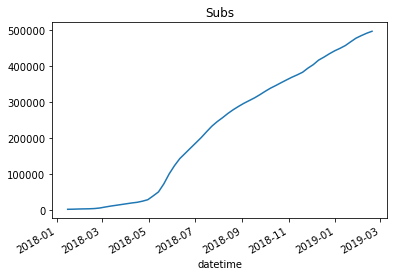

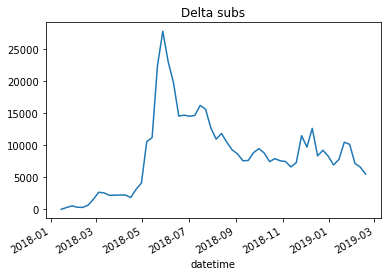

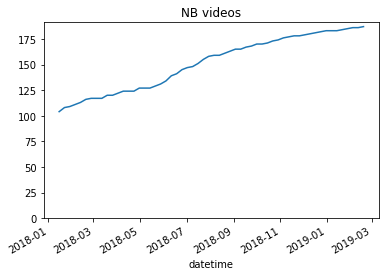

,channel,views,delta_views,subs,delta_subs,videos,delta_videos,activity
datetime,,,,,,,,
2018-01-15,UC-o9_uk3EqdIX4Lmqc0jp_Q,341367.000000,8667.000000,1059.250000,0.000000,104,0,4
2018-01-22,UC-o9_uk3EqdIX4Lmqc0jp_Q,376363.250000,34996.250000,1336.875000,277.625000,108,4,7
2018-01-29,UC-o9_uk3EqdIX4Lmqc0jp_Q,439330.000000,62966.750000,1868.000000,531.125000,109,1,5
2018-02-05,UC-o9_uk3EqdIX4Lmqc0jp_Q,482564.100000,43234.100000,2191.400000,323.400000,111,2,4
2018-02-12,UC-o9_uk3EqdIX4Lmqc0jp_Q,521622.777778,39058.677778,2482.888889,291.488889,113,2,5


In [9]:
ytb = s_timeseries[(s_timeseries['channel'] == 'UC-o9_uk3EqdIX4Lmqc0jp_Q') &
                   (s_timeseries['subs'] < 500000)] \
                   .set_index('datetime')

#plot
ytb['subs'].plot()
plt.title('Subs')
plt.show()

ytb['delta_subs'].plot()
plt.title('Delta subs')
plt.show()

ytb['videos'].plot()
plt.title('NB videos')
plt.ylim(bottom=0)
plt.show()

ytb.head()

***
# Buzz date
For each youtuber, assign a buzz date: the date when the most people subscribed to the channel (before reaching 500.000 subscribers). You can find the highest <code>delta_subs</code> for each channel.

In [10]:
buzz_timeseries = s_timeseries.loc[s_timeseries[s_timeseries['subs'] < 500000].groupby(['channel'])["delta_subs"].idxmax()]  
buzz_timeseries

,channel,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
242500,UC-3fLOkTRb7-tepOqxsDdDg,2018-10-08 01:00:00,4.783671e+07,2.754739e+07,284477.880208,156505.347801,9,0,1
14804,UC-3kgKqj1HxWG9_Q-NgYHGg,2019-02-04 00:00:00,3.885855e+07,2.607224e+06,331769.750000,17982.125000,54,2,4
113306,UC-5AC4tBRWdUvDrlU0DMgwg,2018-09-10 00:00:00,4.329795e+07,6.359236e+06,157019.000000,23758.375000,265,5,14
124490,UC-5Yj4HIiruwkzFuLflxL_w,2018-02-26 00:00:00,1.076137e+08,5.962944e+06,428402.125000,22665.125000,540,19,40
341344,UC-6CA78zz_ZBl1vvJs5cWlw,2018-08-20 01:00:00,1.987553e+07,2.645193e+06,161995.968750,28254.458333,236,4,8
...,...,...,...,...,...,...,...,...,...
28285,UCzr30osBdTmuFUS8IfXtXmg,2019-05-06 00:00:00,4.058373e+07,7.227036e+05,439014.375000,11553.875000,225,2,3
49834,UCzrzsClnsxBuzBuYqpxL1-A,2019-02-24 23:00:00,8.814127e+07,7.931725e+06,334406.723958,25719.760417,9,0,1
33010,UCzuj9sYnHfYZ_JJAanBnAFQ,2019-05-13 00:00:00,1.482994e+08,4.562320e+06,433331.000000,15795.375000,741,13,29
290797,UCzvqf364TVLEX3sWA07sssA,2018-07-16 00:00:00,1.232703e+08,5.473238e+06,306020.000000,18572.250000,143,3,5


***
# Videos during buzzing period
For each channel you can take all the videos uploaded 8 weeks preceeding the buzz date. There will be the buzzing video and other videos with less views (quiet videos).

In [11]:
#We take all the videos 2 months before the "buzz date"

buzz_videos = pd.merge(s_metadata, buzz_timeseries[['channel','datetime']], on='channel')
buzz_videos = buzz_videos[(buzz_videos['upload_date'] < buzz_videos['datetime']) &
                          (buzz_videos['upload_date'] > buzz_videos['datetime'] - pd.to_timedelta('8 W')) &
                          (buzz_videos['view_count'] > 1000)].drop(['datetime'], axis=1)

***
# Buzz video

For each channel find the video that led to the buzz of the channel. You can consider the most viewed video in a period of 8 weeks (2 months) preceeding the buzz date.

Plot the views of these videos to have a sens of the general trend.

Finally, plot a histogram comparing the months of upload for these buzz videos.

In [12]:
buzz_video_max = buzz_videos.loc[buzz_videos.groupby(['channel'])["view_count"].idxmax()]  

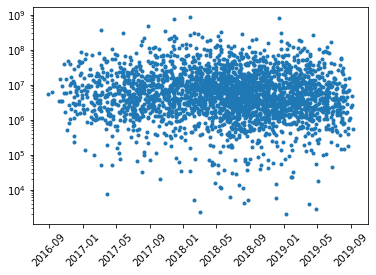

In [13]:
plt.plot(buzz_video_max.upload_date, buzz_video_max.view_count, '.')
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

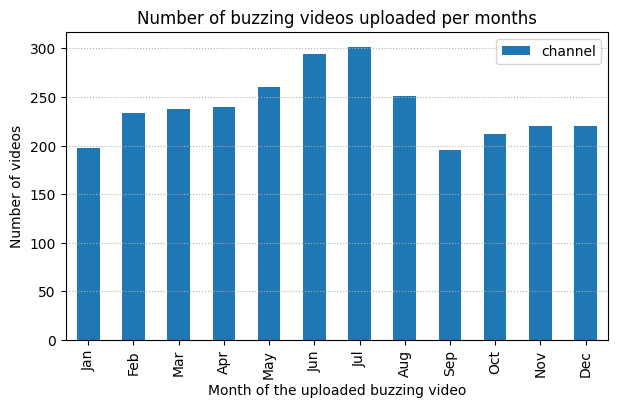

In [12]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

buzz_videos_perM = buzz_video_max.groupby(buzz_video_max['upload_date'].dt.month).count()[['channel']]
buzz_videos_perM['months'] = months
buzz_videos_perM.set_index('months', inplace=True)

buzz_videos_perM.plot(kind="bar",figsize=(7,4))
plt.grid(axis='y', ls=':')
plt.title('Number of buzzing videos uploaded per months')
plt.xlabel('Month of the uploaded buzzing video')
plt.ylabel('Number of videos')
plt.show()


We see that most of the buzzing videos are uploaded in June or July. However this is maybe just because more videos are posted during this period. We should plot the rate at wich videos buzz for each month.

***
# Compare buzzing / quiet videos using A/B tests


### 1. Form a A/B test dataframe
Now we will create pairs comparing the videos of a same youtuber. For example if a youtuber uploaded 3 videos during the period preceeding the buzz date, we will have a dataframe as follows:

| channel   | winning_video | views1    | losing_video | views2    |
|-----------|---------------|-----------|--------------|-----------|
| channel_a | video1        | 1.000.000 | video2       | 9.000     |
| channel_a | video3        | 1.500.000 | video1       | 1.000.000 |
| channel_a | video3        | 1.500.000 | video2       | 9.000     |

In order to have a significant difference in the impact of the videos for the channel, we will only keep pairs where the most seen video has more than a 500 times more views than the least seen video. The A/B dataframe will become : 

| channel   | winning_video | views1    | losing_video | views2  |
|-----------|---------------|-----------|--------------|---------|
| channel_a | video1        | 1.000.000 | video2       | 9.000   |
| channel_a | video3        | 1.500.000 | video2       | 9.000   |

Video 1 and 3 are considered as buzzing videos, whereas video 2 is a quiet one. 

In [14]:
AB_videos = pd.merge(buzz_videos, buzz_videos, on='channel', suffixes=('_1','_2'))
AB_videos = AB_videos[(AB_videos['view_count_1'] > 500*AB_videos['view_count_2'])]
AB_videos

,channel,dislike_count_1,display_id_1,duration_1,like_count_1,tags_1,title_1,upload_date_1,view_count_1,dislike_count_2,display_id_2,duration_2,like_count_2,tags_2,title_2,upload_date_2,view_count_2
171,UCzx8WFdvYyQgPuLY3XSU83Q,2263.0,heBbONlK7L0,107,20642.0,"Hair growth serum,regrow new hair,grow new hai...",Hair growth serum | Must watch,2017-05-04,2805318.0,7.0,iwqKUVkBXLU,27,48.0,BEAUTY MOTIVATION,Most beautiful woman in the world ♡,2017-04-04,2400.0
181,UCzx8WFdvYyQgPuLY3XSU83Q,2263.0,heBbONlK7L0,107,20642.0,"Hair growth serum,regrow new hair,grow new hai...",Hair growth serum | Must watch,2017-05-04,2805318.0,2.0,ZZ-UeQ1_ch8,192,55.0,NaN,Homemade soap | Q & A,2017-03-21,4043.0
265,UCzx8WFdvYyQgPuLY3XSU83Q,3321.0,QeATQxXlNC8,183,25586.0,NaN,Homemade Natural eyeliner pen ♡,2017-05-02,2397861.0,7.0,iwqKUVkBXLU,27,48.0,BEAUTY MOTIVATION,Most beautiful woman in the world ♡,2017-04-04,2400.0
275,UCzx8WFdvYyQgPuLY3XSU83Q,3321.0,QeATQxXlNC8,183,25586.0,NaN,Homemade Natural eyeliner pen ♡,2017-05-02,2397861.0,2.0,ZZ-UeQ1_ch8,192,55.0,NaN,Homemade soap | Q & A,2017-03-21,4043.0
27670,UCzfiX4f0hDjkyTVTOrvVESQ,1837.0,wvDjmZ4YDuk,637,19390.0,"Channel Punjab,amricka girl,amritsar boy",ਅਮਰੀਕਾ ਦੀ ਗੋਰੀ ਅੰਮ੍ਰਿਤਸਰ ਦੇ ਮੁੰਡੇ ਪਿੱਛੇ ਹੋਈ ਪਾ...,2018-10-04,2029114.0,1.0,hsBhtN8VPNA,271,66.0,"Channel Punjab,Punjab News,Punjab,Crime,News,T...",ਜੋਰ ਜਵਾਨੀ ਦਾ ਜਾ ਜੋਰ ਖਾਧ ਖੁਰਾਕਾਂ ਦਾ | Tug of WA...,2018-10-06,2945.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29119540,UC-o9_uk3EqdIX4Lmqc0jp_Q,21737.0,14AdTNggBy0,241,260593.0,"sapna video song,sapna haryanvi song,sapna vid...",Teri Aakhya Ka Yo Kajal | Dance Choreography B...,2018-05-15,39344251.0,46.0,YcWdW5GkBwo,83,1293.0,"ek do teen,ek do teen baaghi 2,baaghi 2 songs,...",Ek Do Teen | Baaghi 2 | Dance Choreography By ...,2018-04-24,61536.0
29119541,UC-o9_uk3EqdIX4Lmqc0jp_Q,21737.0,14AdTNggBy0,241,260593.0,"sapna video song,sapna haryanvi song,sapna vid...",Teri Aakhya Ka Yo Kajal | Dance Choreography B...,2018-05-15,39344251.0,10.0,iWstt7KxTxE,100,202.0,"boom,dance,choreography,gucci mane,tiesto,boom...",BOOM - Tiesto ft Gucci Mane Dance | Matt Steff...,2018-04-07,7414.0
29119542,UC-o9_uk3EqdIX4Lmqc0jp_Q,21737.0,14AdTNggBy0,241,260593.0,"sapna video song,sapna haryanvi song,sapna vid...",Teri Aakhya Ka Yo Kajal | Dance Choreography B...,2018-05-15,39344251.0,5.0,NqbsdcchfOQ,62,139.0,"tip toe,jason derulo,tip toe jason derulo,fren...",TIP TOE - Jason Derulo ft French Montana Dance...,2018-04-05,3818.0
29119559,UC-o9_uk3EqdIX4Lmqc0jp_Q,6064.0,O0Te87FwpDw,59,139428.0,"bhangra,desi,urban,kamal singh,urban desi,suri...",Daru Badnaam | Kamal Kahlon & Param Singh | Da...,2018-04-25,9405846.0,10.0,iWstt7KxTxE,100,202.0,"boom,dance,choreography,gucci mane,tiesto,boom...",BOOM - Tiesto ft Gucci Mane Dance | Matt Steff...,2018-04-07,7414.0


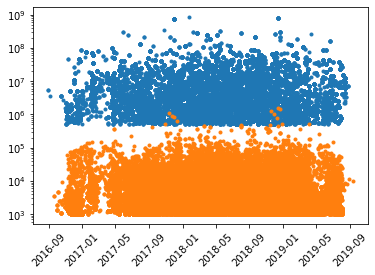

In [15]:
plt.plot(AB_videos.upload_date_1, AB_videos.view_count_1, '.')
plt.plot(AB_videos.upload_date_2, AB_videos.view_count_2, '.')
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

In [30]:
len(AB_videos.drop_duplicates('channel'))
len(AB_videos.drop_duplicates('display_id_1'))
len(AB_videos.drop_duplicates('display_id_2'))

28411

### 2. Significance of videos duration
Using <code>stats.ttest_ind</code> from <code>scipy</code>, compute the p-value to compare the duration of the buzzing videos and the non-buzzing videos. Also print the mean difference in videos duration.

In [16]:
mean_duration_1 = AB_videos['duration_1'].mean()
mean_duration_2 = AB_videos['duration_2'].mean()
mean_diff_duration = mean_duration_1 - mean_duration_2
print('Mean difference in videos duration:', round(mean_diff_duration,2), "seconds")
print('Mean duration of buzzing videos:', round(mean_duration_1,2), "seconds")
print('Mean duration of quiet videos:', round(mean_duration_2,2), "seconds")

print('P-value comparing durations of buzzing and non-buzzing videos:', \
      stats.ttest_ind(AB_videos['duration_1'], AB_videos['duration_2'], equal_var=True).pvalue)

Mean difference in videos duration: 165.67 seconds
Mean duration of buzzing videos: 671.16 seconds
Mean duration of quiet videos: 505.49 seconds
P-value comparing durations of buzzing and non-buzzing videos: 3.3006608057840337e-139


### Analysis of the title 

In [41]:
title = AB_videos.copy()
#title.drop(['duration_1'],[])
def count_words_simple(string):
    return len(string.split(" "))

#num words in title
title['numwords1'] = title["title_1"].apply(count_words_simple)
title['numwords2'] = title["title_2"].apply(count_words_simple)
   
#capital letter
title['num_capital_letter1'] =title["title_1"].apply(lambda x : sum(map(str.isupper, x.split())))
title['num_capital_letter2'] =title["title_2"].apply(lambda x : sum(map(str.isupper, x.split())))
title['is_capital_letter1']= 0
title['is_capital_letter2']= 0
title['is_capital_letter1'][title.num_capital_letter1 >= 3]=1
title['is_capital_letter2'][title.num_capital_letter2 >= 3]=1

In [43]:
#featuring 
featuring_wordsets = list(('ft', 'feat', 'featuring', 'with', 'collab',"w/"))

# is_in_string is a fuction returning 1 if a word from a wordlist is in a string, 0 otherwise
def is_in_string (string, wordlist):
    if any(word in string.lower().split(' ') for word in wordlist):
        return 1
    else :
        return 0

title['feat1'] = title['title_1'].apply(is_in_string, args=[featuring_wordsets])
title['feat2'] = title['title_2'].apply(is_in_string, args=[featuring_wordsets])

In [36]:
title

,channel,dislike_count_1,display_id_1,duration_1,like_count_1,tags_1,title_1,upload_date_1,view_count_1,dislike_count_2,...,view_count_2,numtags1,numtags2,numwords1,numwords2,num_capital_letter1,num_capital_letter2,is_capital_letter2,feat1,feat2
171,UCzx8WFdvYyQgPuLY3XSU83Q,2263.0,heBbONlK7L0,107,20642.0,"Hair growth serum,regrow new hair,grow new hai...",Hair growth serum | Must watch,2017-05-04,2805318.0,7.0,...,2400.0,7,1,6,7,0,0,0,0,0
181,UCzx8WFdvYyQgPuLY3XSU83Q,2263.0,heBbONlK7L0,107,20642.0,"Hair growth serum,regrow new hair,grow new hai...",Hair growth serum | Must watch,2017-05-04,2805318.0,2.0,...,4043.0,7,1,6,6,0,2,0,0,0
265,UCzx8WFdvYyQgPuLY3XSU83Q,3321.0,QeATQxXlNC8,183,25586.0,NaN,Homemade Natural eyeliner pen ♡,2017-05-02,2397861.0,7.0,...,2400.0,1,1,5,7,0,0,0,0,0
275,UCzx8WFdvYyQgPuLY3XSU83Q,3321.0,QeATQxXlNC8,183,25586.0,NaN,Homemade Natural eyeliner pen ♡,2017-05-02,2397861.0,2.0,...,4043.0,1,1,5,6,0,2,0,0,0
27670,UCzfiX4f0hDjkyTVTOrvVESQ,1837.0,wvDjmZ4YDuk,637,19390.0,"Channel Punjab,amricka girl,amritsar boy",ਅਮਰੀਕਾ ਦੀ ਗੋਰੀ ਅੰਮ੍ਰਿਤਸਰ ਦੇ ਮੁੰਡੇ ਪਿੱਛੇ ਹੋਈ ਪਾ...,2018-10-04,2029114.0,1.0,...,2945.0,3,10,15,16,0,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29119540,UC-o9_uk3EqdIX4Lmqc0jp_Q,21737.0,14AdTNggBy0,241,260593.0,"sapna video song,sapna haryanvi song,sapna vid...",Teri Aakhya Ka Yo Kajal | Dance Choreography B...,2018-05-15,39344251.0,46.0,...,61536.0,18,22,15,18,0,2,0,0,0
29119541,UC-o9_uk3EqdIX4Lmqc0jp_Q,21737.0,14AdTNggBy0,241,260593.0,"sapna video song,sapna haryanvi song,sapna vid...",Teri Aakhya Ka Yo Kajal | Dance Choreography B...,2018-05-15,39344251.0,10.0,...,7414.0,18,30,15,11,0,1,0,0,1
29119542,UC-o9_uk3EqdIX4Lmqc0jp_Q,21737.0,14AdTNggBy0,241,260593.0,"sapna video song,sapna haryanvi song,sapna vid...",Teri Aakhya Ka Yo Kajal | Dance Choreography B...,2018-05-15,39344251.0,5.0,...,3818.0,18,32,15,13,0,2,0,0,1
29119559,UC-o9_uk3EqdIX4Lmqc0jp_Q,6064.0,O0Te87FwpDw,59,139428.0,"bhangra,desi,urban,kamal singh,urban desi,suri...",Daru Badnaam | Kamal Kahlon & Param Singh | Da...,2018-04-25,9405846.0,10.0,...,7414.0,34,30,14,11,0,1,0,0,1


In [45]:
mean_len_1 = title['numwords1'].mean()
mean_len_2 = title['numwords2'].mean()
mean_diff_len = mean_len_1 - mean_len_2
print('Mean difference in videos length:', round(mean_diff_len,2), "words")
print('Mean length title of buzzing videos:', round(mean_len_1,2), "words")
print('Mean length title of quiet videos:', round(mean_len_2,2), "words")

print('P-value comparing number of words in title of buzzing and non-buzzing videos:', \
      stats.ttest_ind(title['numwords1'], title['numwords2'], equal_var=False).pvalue)

Mean difference in videos length: 0.69 words
Mean length title of buzzing videos: 13.98 words
Mean length title of quiet videos: 13.29 words
P-value comparing number of words in title of buzzing and non-buzzing videos: 0.0


In [44]:
print('P-value comparing number of words in title of buzzing and non-buzzing videos:', \
      stats.ttest_ind(title['feat1'], title['feat2'], equal_var=True).pvalue)
print('P-value comparing number of words in title of buzzing and non-buzzing videos:', \
      stats.ttest_ind(title['is_capital_letter1'], title['is_capital_letter2'], equal_var=True).pvalue)

P-value comparing number of words in title of buzzing and non-buzzing videos: 1.1687443375182287e-25
P-value comparing number of words in title of buzzing and non-buzzing videos: 4.243321704113572e-146


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X = title['feat1']['is_capital_letter1']['numwords1']
Y = 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

## Decision tree

In [20]:
def count_tags(string):
    return len(str(string).split(","))

AB_videos['numtags1'] = AB_videos["tags_1"].apply(count_tags)
AB_videos['numtags2'] = AB_videos["tags_2"].apply(count_tags)

In [ ]:
good_videos['display_id','duration','numtags']

In [69]:
good_videos = pd.DataFrame()
bad_videos = pd.DataFrame()
good_videos[['display_id','duration','numtags']] = AB_videos[['display_id_1','duration_1','numtags1']].drop_duplicates('display_id_1')
good_videos['is_good']= 1
bad_videos[['display_id','duration','numtags']] = AB_videos[['display_id_2','duration_2','numtags2']].drop_duplicates('display_id_2')
bad_videos['is_good']= 0
good_bad_videos = pd.concat([good_videos, bad_videos])


In [70]:
good_bad_videos

,display_id,duration,numtags,is_good
171,heBbONlK7L0,107,7,1
265,QeATQxXlNC8,183,1,1
27670,wvDjmZ4YDuk,637,3,1
32056,hJwHfDj06eE,475,1,1
48941,bWqfW_O-TZg,190,2,1
...,...,...,...,...
29105509,86Q7FS8E1zo,1227,33,0
29105513,Gkrm1TmL90s,1838,33,0
29119540,YcWdW5GkBwo,83,22,0
29119541,iWstt7KxTxE,100,30,0


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X = good_bad_videos[['duration','numtags']]
y= good_bad_videos['is_good']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns);